In [1]:
import pandas as pd
df_img = pd.read_csv("image_features.csv")
df_obj = pd.read_csv("per_object.csv")
print("image_features shape:", df_img.shape)
print(df_img.head(10).to_string(index=False))
print()
print("per_object shape:", df_obj.shape)
print(df_obj.head(10).to_string(index=False))


image_features shape: (27, 40)
 run  molecule_id image_name            image_path                         mask_path  dia  flow_threshold  cellprob_threshold  blur  n_objects   area_mean  area_median    area_std  area_q25  area_q75  eccentricity_mean  solidity_mean  major_axis_mean  minor_axis_mean  mean_intensity_mean  skel_len  skel_branch_pts  skel_end_pts  glcm_contrast  glcm_correlation  glcm_energy  glcm_homogeneity  glcm_ASM  lbp_mean  lbp_var  lbp_entropy  gabor_f0.1_t0_mean  gabor_f0.1_t0_std  gabor_f0.2_t0_mean  gabor_f0.2_t0_std  radial_ps_mean  radial_ps_std  radial_ps_q25  radial_ps_q50  radial_ps_q75
   1          153  153_1.png content/153/153_1.png masks/153/153__153_1__run0001.png   10             0.4                 0.0   0.0         61 3575.852459       2765.0 2656.343438    1760.0    4922.0           0.729826       0.876804        94.950740        52.398380            30.017798      6502              786           204            NaN               NaN          NaN    

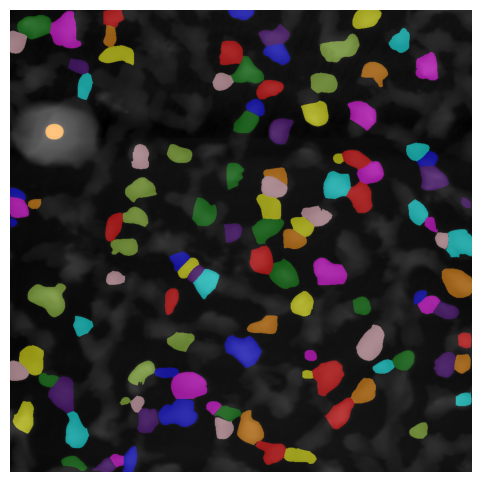

In [2]:
import numpy as np
from skimage import io, color
from skimage.color import label2rgb
import matplotlib.pyplot as plt

img = io.imread("content/153/153_1.png")            # исходная
mask = io.imread("masks/153/153__153_1__run0001.png")  # saved uint16 label image

# привести картинку к RGB для overlay
if img.ndim == 2:
    img_rgb = np.stack([img,img,img], axis=-1)
else:
    img_rgb = img.copy()
# label2rgb автоматически раскрасит метки
overlay = label2rgb(mask, image=img_rgb, bg_label=0, alpha=0.5)

plt.figure(figsize=(6,6))
plt.imshow(overlay)
plt.axis('off')
plt.show()


In [4]:
import numpy as np
from skimage import io
paths = ["masks/153/153__153_1__run0001.png"]  # пример
for p in paths:
    m = io.imread(p)
    print(p, "shape", m.shape, "dtype", m.dtype, "unique labels:", np.unique(m)[:10], "max", m.max())


masks/153/153__153_1__run0001.png shape (1024, 1024) dtype uint16 unique labels: [0 1 2 3 4 5 6 7 8 9] max 116


In [5]:
from skimage import io
import numpy as np

p = "masks/153/153__153_1__run0001.png"
m = io.imread(p)
print(p, "shape", m.shape, "dtype", m.dtype, "unique labels count", np.unique(m).size, "max", m.max())


masks/153/153__153_1__run0001.png shape (1024, 1024) dtype uint16 unique labels count 117 max 116


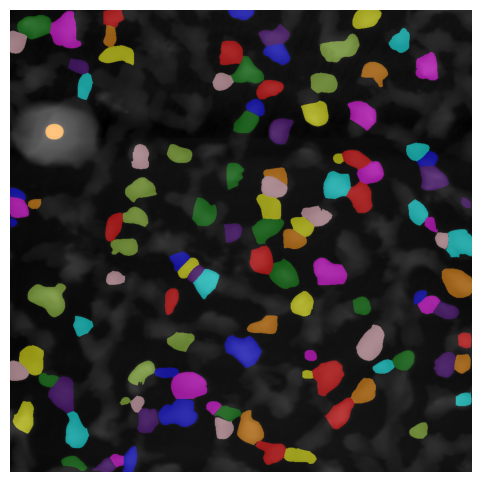

In [6]:
from skimage import io
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np

img = io.imread("content/153/153_1.png")
mask = io.imread("masks/153/153__153_1__run0001.png")
if img.ndim == 2:
    img_rgb = np.stack([img,img,img], axis=-1)
else:
    img_rgb = img.copy()
overlay = label2rgb(mask, image=img_rgb, bg_label=0, alpha=0.5)
plt.figure(figsize=(6,6)); plt.imshow(overlay); plt.axis('off'); plt.show()


In [7]:
import pandas as pd
df = pd.read_csv("image_features.csv")
# выбираем только числовые признаки для агрегации
num_cols = df.select_dtypes(include=['number']).columns.tolist()
# уберём служебные: run, dia, flow_threshold, cellprob_threshold, blur (если нужно оставить — уберите из списка)
agg_cols = [c for c in num_cols if c not in ['run']]
# агрегируем по molecule_id
agg = df.groupby('molecule_id')[agg_cols].agg(['mean','std','median']).reset_index()
# упростим имена колонок
agg.columns = ['_'.join(filter(None, col)).strip('_') for col in agg.columns.values]
agg.to_csv("molecule_image_features.csv", index=False)
print("Saved molecule-level image features to molecule_image_features.csv")


Saved molecule-level image features to molecule_image_features.csv


In [8]:
agg.head()

,molecule_id,molecule_id_mean,molecule_id_std,molecule_id_median,dia_mean,dia_std,dia_median,flow_threshold_mean,flow_threshold_std,flow_threshold_median,...,radial_ps_std_median,radial_ps_q25_mean,radial_ps_q25_std,radial_ps_q25_median,radial_ps_q50_mean,radial_ps_q50_std,radial_ps_q50_median,radial_ps_q75_mean,radial_ps_q75_std,radial_ps_q75_median
0,153,153.0,0.0,153.0,10.0,0.0,10.0,0.4,0.0,0.4,...,2.391837e+10,4.344542e+05,2.242607e+05,5.359788e+05,1.225408e+06,8.062914e+05,1.325119e+06,4.868150e+06,2.991345e+06,5.811302e+06
1,154,154.0,0.0,154.0,10.0,0.0,10.0,0.4,0.0,0.4,...,1.138069e+11,2.582182e+06,1.112535e+06,2.950321e+06,8.977456e+06,3.715756e+06,6.870723e+06,4.198121e+07,1.646278e+07,3.810975e+07
2,156,156.0,0.0,156.0,10.0,0.0,10.0,0.4,0.0,0.4,...,7.411164e+10,1.186963e+06,9.207779e+05,1.604819e+06,2.286391e+07,1.826380e+07,3.146513e+07,9.400875e+07,7.607683e+07,1.300101e+08
3,157,157.0,0.0,157.0,10.0,0.0,10.0,0.4,0.0,0.4,...,1.132265e+11,2.296696e+06,3.867305e+05,2.277332e+06,4.216589e+06,4.560421e+05,4.165892e+06,1.677172e+07,3.290519e+06,1.775513e+07
4,160,160.0,0.0,160.0,10.0,0.0,10.0,0.4,0.0,0.4,...,4.675584e+10,1.037037e+06,5.207326e+05,8.509290e+05,3.263059e+06,9.388092e+05,3.089138e+06,1.643147e+07,8.680991e+06,1.306439e+07
